### Transfer Learninbg with TensorFlow part 2 : Fine Tuning
In the previous notebook, we covered transfer learning feature extraction , now it's time to learn about a new kind of transfer learning called fine tuning.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled tensorflow-2.17.0


In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

## Creating helper functions

In the previous notebooks, we've created a bunch of helper functions, now we could rewrite them all , but it's tedious.

So, it's a good idea to put functions you'll want to use again in a script. You can download and import them into your notebooks (or elsewhere).

We've done this for some of the functions we've used previously, here.

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-08-09 06:00:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-09 06:00:06 (54.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import helper functions we're going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

>🔑**Note:** If you're running this notebook in google colab, when it times out colab will delete `helper_functions.py` and you'll need to redownload it, if you want access to your helper functions.

## Let's get some data

This time we're going to see how we can use pretrained models within tf.keras.applications and apply them to our own problems(recognizing images of our food).

In [ ]:
# Get 10% of training data of 10 classes of Food_101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-08-08 12:57:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   149MB/s    in 1.1s    

2024-08-08 12:57:20 (149 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
# Check out how many images and subdirectories are in our dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [ ]:
# Creating training and test directory paths
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Check out class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# See an example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[163.88776   165.88776   144.88776  ]
   [180.38266   179.38266   159.38266  ]
   [159.58163   162.79591   145.66327  ]
   ...
   [138.35696   142.92844   137.27542  ]
   [123.33163   129.54596   127.47451  ]
   [120.5968    130.18356   129.18356  ]]

  [[169.05103   168.05103   150.05103  ]
   [182.28062   181.28062   161.28062  ]
   [165.81633   169.03061   152.65817  ]
   ...
   [139.30089   141.2856    135.99991  ]
   [117.55618   121.84703   120.704155 ]
   [118.3619    125.57118   125.16809  ]]

  [[163.00511   161.57654   143.79082  ]
   [178.5153    177.4847    159.5      ]
   [158.90816   161.12245   147.7653   ]
   ...
   [140.88771   141.45918   136.45918  ]
   [127.321396  129.47958   126.576546 ]
   [123.51522   128.0765    128.3673   ]]

  ...

  [[ 89.06635    43.066357   19.066357 ]
   [ 87.270386   41.270386   17.270388 ]
   [ 87.16833    41.168327   17.168327 ]
   ...
   [165.09181   103.09182    26.091818 ]
   [161.77553    99.77552    22.775524 ]
   [1

## Model 0 : Building a transfer learning feature extraction model using the Keras Functional API

The sequential API is straight-forward, it runs our layers in sequential order.

But the functional API , gives us more flexibility in our model.

In [ ]:
import tf_keras as keras

# 1. Create base model with tf.keras.applications
base_model = keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained layers aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If using a ResNet50V2 model, you will need to normalize inputs (you don't need for EfficientNet(s))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool of the outputs of the base model (aggregate all the most important information, reduce number of computation)
x = keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after Global Average Pooling: {x.shape}")

# 7. Create the output activation layer
outputs = keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs and the outputs into a model
model_0 = keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 10. Fit the model and save its history
model_0_history = model_0.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)))
                              #callbacks=[create_tensorboard_callback(dir_name="model_0_logs",
                              #                                       experiment_name="transfer_learning_feature_extraction_functional_API")])

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after Global Average Pooling: (None, 1280)
Epoch 1/5
24/24 [==============================] - 73s 652ms/step - loss: 1.9873 - accuracy: 0.3453 - val_loss: 1.4161 - val_accuracy: 0.6826
Epoch 2/5
24/24 [==============================] - 4s 166ms/step - loss: 1.1914 - accuracy: 0.7213 - val_loss: 0.9244 - val_accuracy: 0.8174
Epoch 3/5
24/24 [==============================] - 7s 279ms/step - loss: 0.8743 - accuracy: 0.8053 - val_loss: 0.7293 - val_accuracy: 0.8306
Epoch 4/5
24/24 [==============================] - 8s 304ms/step - loss: 0.7030 - accuracy: 0.8360 - val_loss: 0.6238 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 5s 189ms/step - loss: 0.6036 - accuracy: 0.8680 - val_loss: 0.5531 - val_accuracy: 0.8569


In [ ]:
# Evaluate on the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 8s 101ms/step - loss: 0.5816 - accuracy: 0.8568


[0.581595778465271, 0.8568000197410583]

In [ ]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [ ]:
# How about we get a summary of the base model ?
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [ ]:
# How about the summary of our whole model ?
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

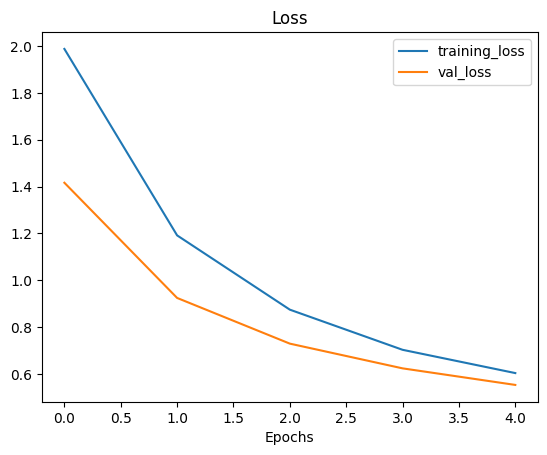

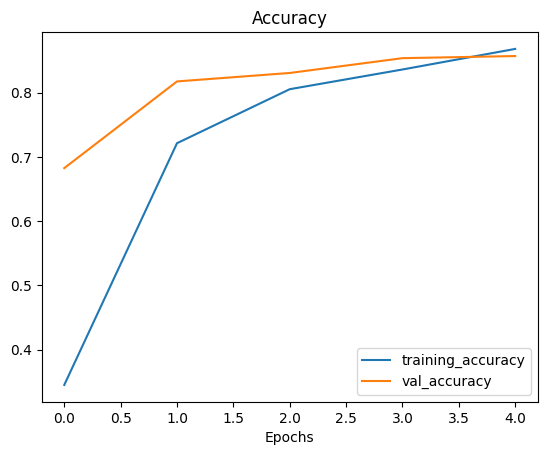

In [ ]:
# Check out our model's training curves
plot_loss_curves(model_0_history)

## Getting a feature vector from a trained model

Let's demonstrate the Global Average Pooling 2D layer...

We have a tensor after our model goes through `base_model` of shape `(None, 7, 7, 1280)`...

But then, when it passes through GlobalAveragePooling2D it turns into `(None, 1280)`.

Let's use a similar shaped tensor of (1, 4, 4, 3) and then pass it to GlobalAveragePooling2D.

In [ ]:
import tensorflow as tf
# Define the input shape
input_shape = (1,4,4,3)

# Create a random tensor
tf.random.set_seed(69)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shape of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of global average pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[-1.1153845   0.12418792  0.73649114]
   [-0.03897176  0.7973445   0.70546585]
   [ 0.2720083   1.1983151   1.2117672 ]
   [ 0.66796565 -0.48221198 -1.1702693 ]]

  [[-1.1269559   0.20064978 -0.5904236 ]
   [-1.3265527   0.90053105 -0.3820634 ]
   [ 0.8218947   0.8225277   0.5785687 ]
   [-0.78238153 -0.4470178   0.15305322]]

  [[-0.70046824 -0.7162952   0.77154213]
   [-0.37679362 -1.001329   -0.427344  ]
   [-0.3572122  -0.05897812 -0.125687  ]
   [-0.15848091 -0.23967737  0.17484951]]

  [[-1.1981035  -1.2974325  -0.2878065 ]
   [ 0.70911485 -0.07435841  0.71228063]
   [-0.24422213 -0.42031264  0.4539454 ]
   [ 1.5826664   0.11488306  4.2742257 ]]]]

2D global average pooled random tensor:
 [[-0.21074234 -0.0361984   0.42428726]]

Shape of input tensor: (1, 4, 4, 3)
Shape of global average pooled 2D tensor: (1, 3)


In [ ]:
# Let's replicate the global average pooled 2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.21074234, -0.0361984 ,  0.42428726]], dtype=float32)>

In [ ]:
# Pass the random tensor through a global average pooling 2D layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print(f"2D global max pooled random tensor:\n {global_max_pooled_tensor}\n")

2D global max pooled random tensor:
 [[1.5826664 1.1983151 4.2742257]]



In [ ]:
# Let's replicate the global max pooled 2D layer
tf.reduce_max(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.5826664, 1.1983151, 4.2742257]], dtype=float32)>

🔑**Note:** One of the reasons feature extraction transfer learning is named how it is , is because what often happens in pretrained model it outputs a **feature vector**(a long tensor of numbers which represents the learned representation of the model on a particular sample, in our case, this is the output of the `tf.keras.GlobalAveragePooling2D()` layer) which can then be used to extract patterns out of our own specific problem.

## Running a series of transfer learning experiments

We've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with only 1% of the training data...how about we set up a bunch of experiments to find out:

1. `model_1` - use feature extraction transfer learning with 1% of the training data with data augmentation
2. `model_2` - use feature extraction transfer learning with 10% of the training data with data augmentation
3. `model_3` - use fine-tuning transfer learning with 10% of the training data with data augmentation
4. `model_4` - use fine-tuning transfer learning with 100% of the training data with data augmentation

🔑**Note:** Throughout all experiments the same test dataset will be used to evaluate our model...this ensures consistency across evaluation metrics.

## Getting and preprocessing data for our model 1

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2024-08-08 12:59:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   198MB/s    in 0.6s    

2024-08-08 12:59:25 (198 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
# How many images are we working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There a

In [ ]:
# Setup the data loaders
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

To add data augmentation right into our models, we can use the layers inside:
* `tf.keras.layers.experimental.preprocessing` by now , it might be just `tf.keras.preprocessing`

Off the top of our heads, after reading the docs, the benefits of using data augmentation inside the model are:
* Preprocessing of Images (augmenting them) happens on the GPU (much faster) than the CPU.
* Image data augmentation only happens during training, so we can still export our whole model and use it elsewhere.

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

# Create data augmentation stage with horizontal flipping, rotations, zooms, etc
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  #layers.Rescaling(1./255) # Keep for models like Resnet50V2 but EfficientNet's having rescale built-in
], name="data_augmentation")

### Visualize our data augmentation layer (and see what happens to our data)

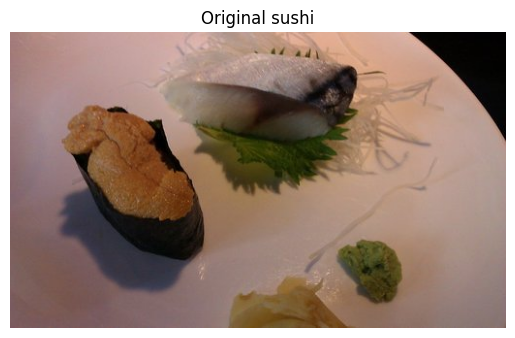

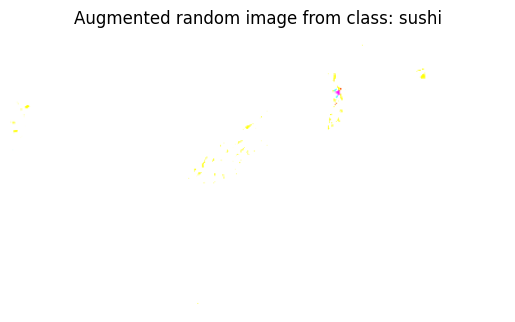

In [ ]:
# View a random image and compare it to it's augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read in and plot the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original {target_class}")
plt.axis(False)

# Now let's plot our augmented random image
augmented_image = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_image))
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
#!pip uninstall tensorflow

In [ ]:
#!pip install tensorflow==2.15.0

## Model 1 : Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224,224,3)
base_model = keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create the input layer
inputs = keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give the base model inputs after data augmentation and don't train it
x = base_model(x, training=False)

# Pool the outputs of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make the model using the inputs and the ouput
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
model_1_history = model_1.fit(train_data_1_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_1_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25 * len(test_data)),
                               callbacks=[create_tensorboard_callback(dir_name="model_1_logs",
                                                                      experiment_name="1_percent_data_augmentation")])

Saving TensorBoard log files to: model_1_logs/1_percent_data_augmentation/20240808-125937
Epoch 1/5
3/3 [==============================] - 23s 4s/step - loss: 2.4616 - accuracy: 0.1000 - val_loss: 2.2599 - val_accuracy: 0.1513
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.2306 - accuracy: 0.1857 - val_loss: 2.1517 - val_accuracy: 0.2253
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 2.0462 - accuracy: 0.2429 - val_loss: 2.0756 - val_accuracy: 0.2632
Epoch 4/5
3/3 [==============================] - 7s 2s/step - loss: 1.8932 - accuracy: 0.4571 - val_loss: 1.9745 - val_accuracy: 0.3421
Epoch 5/5
3/3 [==============================] - 6s 2s/step - loss: 1.6944 - accuracy: 0.5429 - val_loss: 1.8919 - val_accuracy: 0.3865


In [ ]:
# Check out our model summary
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810 

In [ ]:
# Evaluate on the full test dataset
results_1 = model_1.evaluate(test_data)
results_1

79/79 [==============================] - 8s 90ms/step - loss: 1.8982 - accuracy: 0.3740


[1.8981915712356567, 0.37400001287460327]

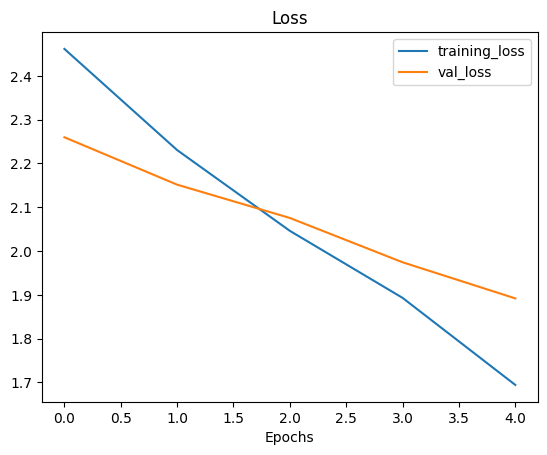

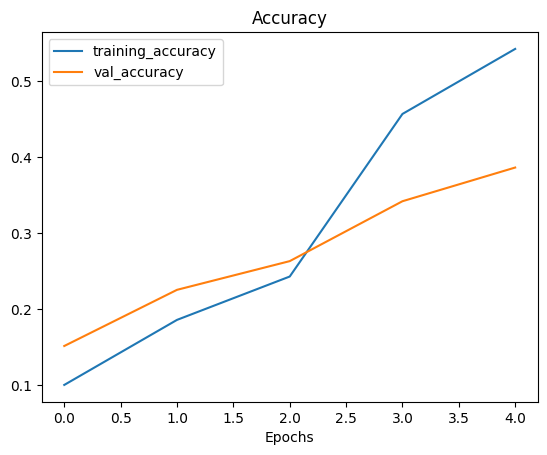

In [ ]:
# How does the model go with data augmentation ?
plot_loss_curves(model_1_history)

## Model 2: feature extraction transfer learning model with 10% of the data and data augmentation

In [ ]:
# Get 10% of the data (uncomment if you don't hsave to)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

--2024-08-09 04:33:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   136MB/s    in 1.2s    

2024-08-09 04:33:06 (136 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Set up data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# How many images are in our directories ?
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
# Create model 2 with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # if you're using a model such as ResNet50V2, you'll need to rescale your data, efficientnet has rescaling built-in
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs and outputs (including the layers in between)
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs) # augment our training images (augmentation doesn't occur on test data)
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, this also insures batchnorm layers don't get updated - https://keras.io/guides/transfer_learning/#build-a-model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_2D   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                             

### Creating a ModelCheckpoint callback

The ModelCheckpoint callback intermediately saves our model (the full model or just the weights) during training. This is useful so we can comebcak and start where we left off.

In [ ]:
# Set checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weight only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch", #save every epoch
                                                         verbose=1)

### Fit Model 2 passing in the model checkpoint callback

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_2 = model_2.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="model_2_logs",
                                                               experiment_name="10_percent_data_augmentation"),
                                   checkpoint_callback])

Saving TensorBoard log files to: model_2_logs/10_percent_data_augmentation/20240809-043319
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9519 - accuracy: 0.3627
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 66s 2s/step - loss: 1.9519 - accuracy: 0.3627 - val_loss: 1.3877 - val_accuracy: 0.6941
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3114 - accuracy: 0.6960
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 47s 2s/step - loss: 1.3114 - accuracy: 0.6960 - val_loss: 0.9589 - val_accuracy: 0.8010
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9951 - accuracy: 0.7560
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 45s 2s/step - loss: 0.9951 - accuracy: 0.7560 - val_loss: 0.7627 - val_accuracy: 0.8372
Epoch 

In [ ]:
# What were model_0 results ?
model_0.evaluate(test_data)

NameError: name 'model_0' is not defined

In [ ]:
#Check model_2 results on all test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 76ms/step - loss: 0.6178 - accuracy: 0.8460


[0.6177912354469299, 0.8460000157356262]

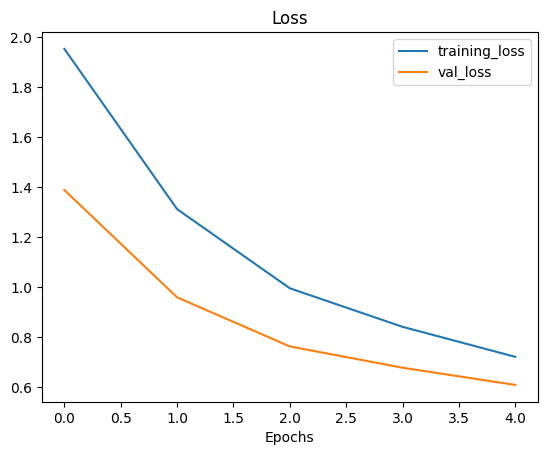

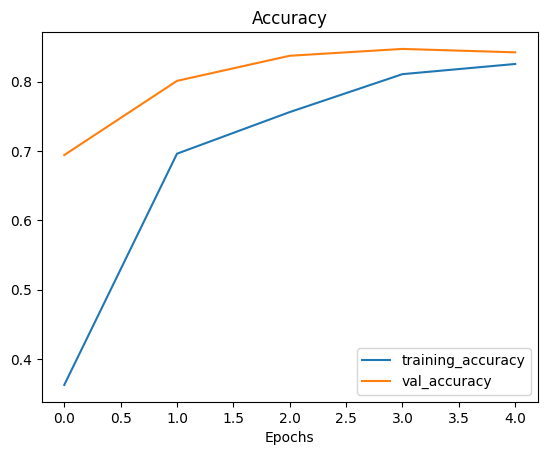

In [ ]:
# Plot the loss curves
plot_loss_curves(history_2)

### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint.

In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
# Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)
loaded_weights_model_results

79/79 [==============================] - 6s 65ms/step - loss: 0.6178 - accuracy: 0.8460


[0.6177911758422852, 0.8460000157356262]

In [ ]:
# If the results from our previously evaluated model_2 match the loaded weights, everything has worked!
results_10_percent_data_aug == loaded_weights_model_results

False

In [ ]:
# Check to see if loaded model results are very close to our previous non-loaded model results
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

## Model 3: Fine-tuning an existing model on 10% of the data

>🔑**Note:** Fine tuning works best after training a feature extraction model for a few epochs with large amounts of custom data.

In [ ]:
# Layers in loaded model
model_2.layers

In [ ]:
# Are these layers trainable ?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7b35f77d2230> True
<keras.src.engine.sequential.Sequential object at 0x7b3679f45900> True
<keras.src.engine.functional.Functional object at 0x7b35f1c1b4f0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7b3600a4eb60> True
<keras.src.layers.core.dense.Dense object at 0x7b35f427b850> True


In [ ]:
# What layers are in our base model (EfficientB0) and they are trainable or not ?
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 rescaling_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# How many trainable variables are in our base model ?
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# To begin fine-tuning , let's start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning, you typically want to lower the learning rate by 10x*
                metrics=["accuracy"])

>🔑**Note:** When fine tuning , it's best practice to lower your learning rate by some amount. How much? This is a hyperparameter you can tune. But a good rule of thumb is atleast 10x (though different sources claim might claim other values.)

A good resource for information on this is the UMLFit Paper.

In [ ]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 rescaling_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# Now we've frozen some of the layers closer to the top, how many trainable variables are there ?
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                                    epochs=fine_tune_epochs,
                                                    validation_data=test_data,
                                                    validation_steps=int(0.25 * len(test_data)),
                                                    initial_epoch=history_2.epoch[-1], # start training from previous last epoch
                                                    callbacks=[create_tensorboard_callback(dir_name="model_2_logs",
                                                                                          experiment_name="10_percent_data_augmentation_fine_tune")])

Saving TensorBoard log files to: model_2_logs/10_percent_data_augmentation_fine_tune/20240808-132545
Epoch 5/10
24/24 [==============================] - 28s 748ms/step - loss: 0.6222 - accuracy: 0.8280 - val_loss: 0.4595 - val_accuracy: 0.8602
Epoch 6/10
24/24 [==============================] - 16s 637ms/step - loss: 0.4964 - accuracy: 0.8507 - val_loss: 0.4452 - val_accuracy: 0.8487
Epoch 7/10
24/24 [==============================] - 16s 657ms/step - loss: 0.4446 - accuracy: 0.8653 - val_loss: 0.4467 - val_accuracy: 0.8536
Epoch 8/10
24/24 [==============================] - 16s 645ms/step - loss: 0.3876 - accuracy: 0.8920 - val_loss: 0.3899 - val_accuracy: 0.8766
Epoch 9/10
24/24 [==============================] - 14s 570ms/step - loss: 0.3541 - accuracy: 0.9067 - val_loss: 0.3850 - val_accuracy: 0.8668
Epoch 10/10
24/24 [==============================] - 14s 576ms/step - loss: 0.3386 - accuracy: 0.8987 - val_loss: 0.4035 - val_accuracy: 0.8701


In [ ]:
# Evaluate the fine-tuned model (model 3 , which is actually model 2 fine-tuned for another 5 epochs)
results_10_percent_data_aug_fine_tune = model_2.evaluate(test_data)
results_10_percent_data_aug_fine_tune

79/79 [==============================] - 6s 75ms/step - loss: 0.4141 - accuracy: 0.8660


[0.4141197204589844, 0.8659999966621399]

Upon checking with the results of the earlier model_2 , we see that we have gained improvement in the performance

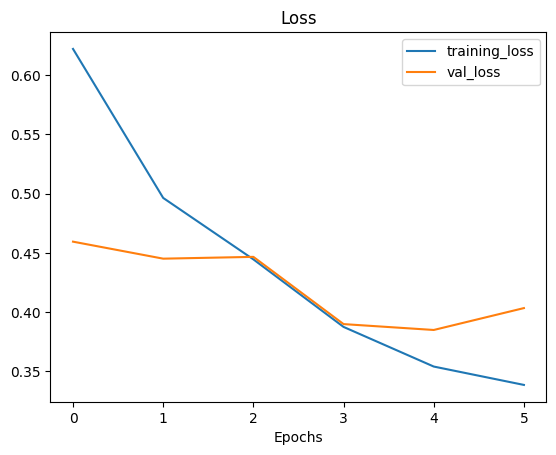

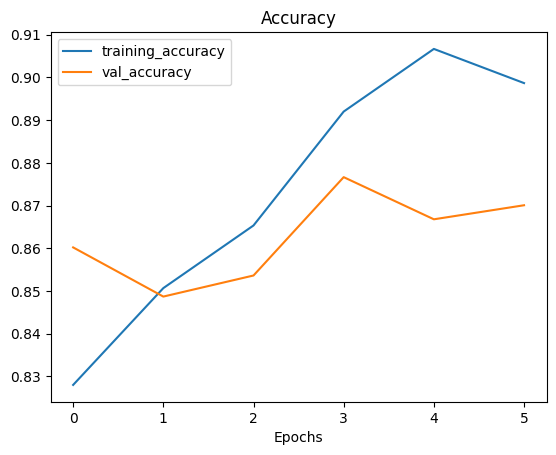

In [ ]:
# Check out the loss curves of our fine-tuned model
plot_loss_curves(history_fine_tune_10_percent_data_aug)

The `plot_loss_curves` function works great with models which have only been fit once, however we want something to compare one series of running `fit()` with another(e.g. before and after fine-tuning).

In [ ]:
# Let's create a function to compare training histories
import matplotlib.pyplot as plt
def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compare two TensorFlow history objects.
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history with new history
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

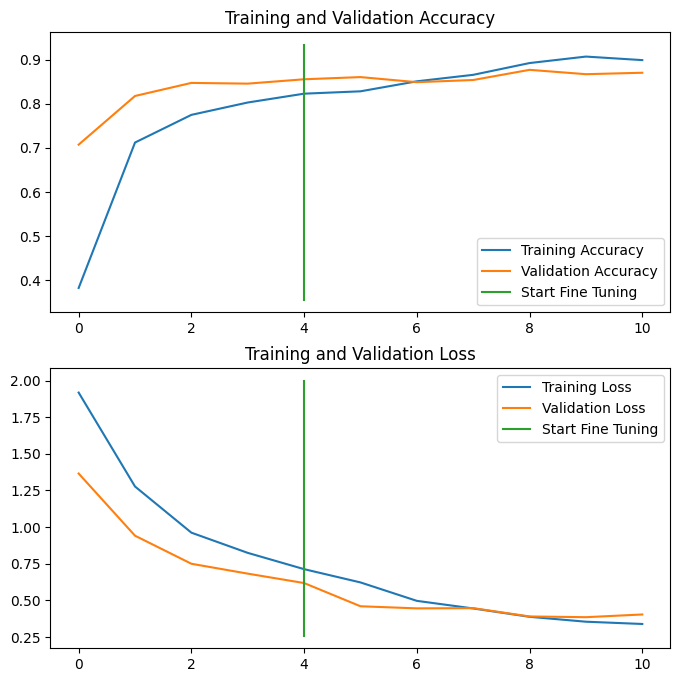

In [ ]:
compare_historys(history_2,
                 history_fine_tune_10_percent_data_aug,
                 initial_epochs=5)

## Model 4: Fine-tuning our existing model on all of our data

In [ ]:
# Download and unzip 10 classes of Food101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2024-08-09 04:24:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 173.194.203.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  52.5MB/s    in 7.0s    

2024-08-09 04:24:40 (70.7 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
# Setup training and test dir
train_dir_all_data = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# How many images are we working with now ?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The test dataset we've loaded in is the same as what we've been using for previous experiments (all experiments have used the same test dataset).

### To train a fine-tuning model (model 4) we need to revert model_2 back to its feature extraction weights.

In [ ]:
# Load weights from checkpoints , that way we can fine-tune from the same stage the 10 percent data model was fine tuned on
model_2.load_weights(checkpoint_path)

In [ ]:
# Let's evaluate model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 6s 65ms/step - loss: 0.6178 - accuracy: 0.8460


[0.6177912950515747, 0.8460000157356262]

In [ ]:
# Check to see if our model_2 has been reverted back to its feature extraction results
results_10_percent_data_aug

[0.6177912354469299, 0.8460000157356262]

## What's done and needs to be done

Alright, the previous steps might seem confusing but all we've done is :

1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data with data augmentation(model_2) and we saved the models' weights using the `ModelCheckpoint` callback.
2. Fine-tuned the same model on the same 10% of the data for another 5 epochs , with the top 10 layers of the base model unfrozen (model_3).
3. Saved the results and training logs each time.
4. Reloaded the model from step 1 to do the same steps as step 2 except this time we are going to use all of the data (model_4).

In [ ]:
# Check which layers are trainable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [ ]:
# Let's drill into our base_model (efficientnetb0) and see what layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [ ]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
# Continue to train and fine-tune the model to our data (100% of the data)
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_all_data,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_2.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="model_2_logs",
                                                                                 experiment_name="10_classes_full_fine_tune")])

Saving TensorBoard log files to: model_2_logs/10_classes_full_fine_tune/20240809-050139
Epoch 5/10
235/235 [==============================] - 128s 500ms/step - loss: 0.6596 - accuracy: 0.7883 - val_loss: 0.3141 - val_accuracy: 0.9062
Epoch 6/10
235/235 [==============================] - 94s 398ms/step - loss: 0.5311 - accuracy: 0.8316 - val_loss: 0.2981 - val_accuracy: 0.8931
Epoch 7/10
235/235 [==============================] - 82s 345ms/step - loss: 0.4665 - accuracy: 0.8487 - val_loss: 0.2771 - val_accuracy: 0.9079
Epoch 8/10
235/235 [==============================] - 73s 308ms/step - loss: 0.4285 - accuracy: 0.8600 - val_loss: 0.2990 - val_accuracy: 0.8980
Epoch 9/10
235/235 [==============================] - 65s 272ms/step - loss: 0.3888 - accuracy: 0.8740 - val_loss: 0.2798 - val_accuracy: 0.9079
Epoch 10/10
235/235 [==============================] - 64s 269ms/step - loss: 0.3663 - accuracy: 0.8781 - val_loss: 0.2808 - val_accuracy: 0.9095


In [ ]:
# Let's evaluate on all of the test data
results_fine_tune_10_classes_full = model_2.evaluate(test_data)
results_fine_tune_10_classes_full

79/79 [==============================] - 6s 68ms/step - loss: 0.2808 - accuracy: 0.9096


[0.2807779014110565, 0.909600019454956]

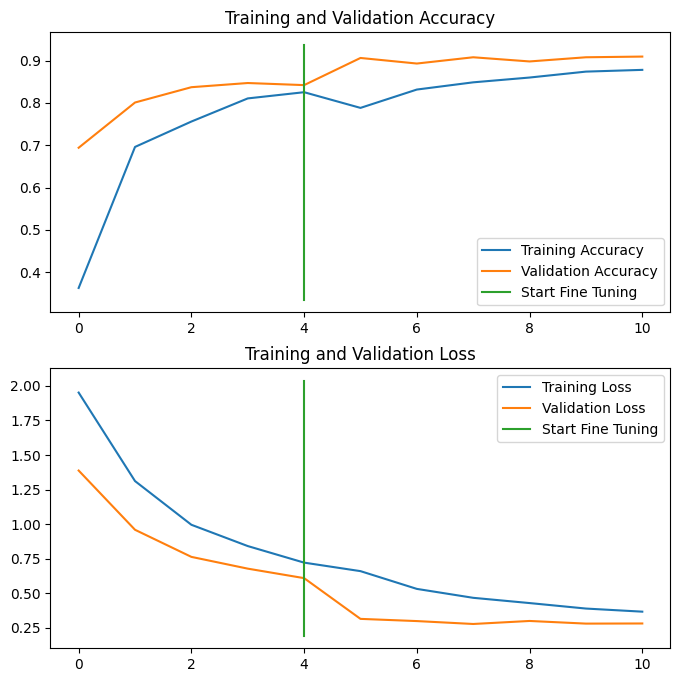

In [ ]:
# How did fine tuning go with more data ?
compare_historys(original_history=history_2,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

# **TensorFlow Exercises** for Practice

In [ ]:
# Get 10% of training data of 10 classes of Food_101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-08-09 06:00:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 173.194.194.207, 142.250.152.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  85.0MB/s    in 1.9s    

2024-08-09 06:00:17 (85.0 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Set checkpoint path
checkpoint_path = "experiment_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weight only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch", #save every epoch
                                                         verbose=1)

In [ ]:
# Creating a base model and saving its weights
import tf_keras as keras

# 1. Create base model with tf.keras.applications
base_model = keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained layers aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If using a ResNet50V2 model, you will need to normalize inputs (you don't need for EfficientNet(s))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool of the outputs of the base model (aggregate all the most important information, reduce number of computation)
x = keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after Global Average Pooling: {x.shape}")

# 7. Create the output activation layer
outputs = keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs and the outputs into a model
model_X = keras.Model(inputs,outputs)

# 9. Compile the model
model_X.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 10. Fit the model and save its history
model_X_history = model_X.fit(train_data_10_percent,
                              epochs=10,
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[checkpoint_callback])

24274472/24274472 [==============================] - 1s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after Global Average Pooling: (None, 1280)
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.8895 - accuracy: 0.4093
Epoch 1: saving model to experiment_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 177s 5s/step - loss: 1.8895 - accuracy: 0.4093 - val_loss: 1.3093 - val_accuracy: 0.7336
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.1379 - accuracy: 0.7507
Epoch 2: saving model to experiment_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 117s 5s/step - loss: 1.1379 - accuracy: 0.7507 - val_loss: 0.8778 - val_accuracy: 0.8191
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.8394 - accuracy: 0.8160
Epoch 3: saving model to experiment_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 131

In [ ]:
#Evaluating the predictions based on model_X outcomes
model_X.evaluate(test_data)

79/79 [==============================] - 128s 2s/step - loss: 0.4442 - accuracy: 0.8748


[0.44422513246536255, 0.8748000264167786]

In [ ]:
# To begin fine-tuning , let's start by setting the last 20 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 20
for layer in base_model.layers[:-20]:
  layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_X.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning, you typically want to lower the learning rate by 10x*
                metrics=["accuracy"])

In [ ]:
# What are these layers and are they trainable or not ?
for layer in model_X.layers:
  print(layer, layer.trainable)

<tf_keras.src.engine.input_layer.InputLayer object at 0x7be8ce737cd0> True
<tf_keras.src.engine.functional.Functional object at 0x7be8be2f3070> True
<tf_keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7be8be2ca800> True
<tf_keras.src.layers.core.dense.Dense object at 0x7be8be27a3b0> True


In [ ]:
# What layers are in our base model (EfficientB0) and they are trainable or not ?
for i, layer in enumerate(model_X.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 10 + 10

# Refit the model (same as model_X except with more trainable layers)
model_X_fine_tuned_20 = model_X.fit(train_data_10_percent,
                                    epochs=fine_tune_epochs,
                                    validation_data=test_data,
                                    validation_steps=int(0.25 * len(test_data)),
                                    initial_epoch=model_X_history.epoch[-1]) # start training from previous last epoch

Epoch 10/20
24/24 [==============================] - 145s 4s/step - loss: 0.5222 - accuracy: 0.8907 - val_loss: 0.4753 - val_accuracy: 0.8849
Epoch 11/20
24/24 [==============================] - 84s 4s/step - loss: 0.4280 - accuracy: 0.9200 - val_loss: 0.4430 - val_accuracy: 0.8914
Epoch 12/20
24/24 [==============================] - 75s 3s/step - loss: 0.3875 - accuracy: 0.9347 - val_loss: 0.4034 - val_accuracy: 0.8947
Epoch 13/20
24/24 [==============================] - 73s 3s/step - loss: 0.3335 - accuracy: 0.9400 - val_loss: 0.3837 - val_accuracy: 0.9030
Epoch 14/20
24/24 [==============================] - 83s 4s/step - loss: 0.2954 - accuracy: 0.9467 - val_loss: 0.3800 - val_accuracy: 0.9013
Epoch 15/20
24/24 [==============================] - 84s 4s/step - loss: 0.2714 - accuracy: 0.9533 - val_loss: 0.3703 - val_accuracy: 0.9030
Epoch 16/20
24/24 [==============================] - 84s 4s/step - loss: 0.2428 - accuracy: 0.9587 - val_loss: 0.3550 - val_accuracy: 0.9062
Epoch 17/20


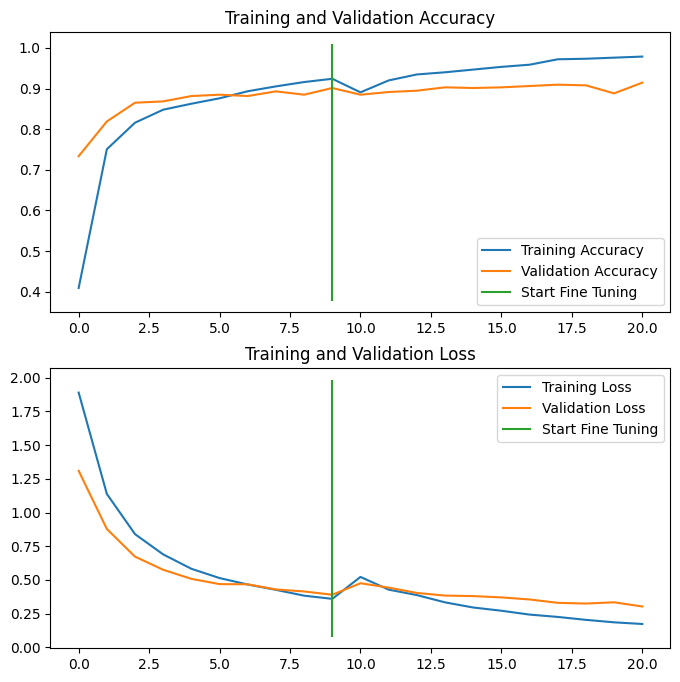

In [ ]:
compare_historys(model_X_history,
                 model_X_fine_tuned_20,
                 initial_epochs=10)

In [ ]:
# Evaluate the results of our fine-tuned model
model_X.evaluate(test_data)

79/79 [==============================] - 128s 2s/step - loss: 0.3617 - accuracy: 0.8916


[0.36171528697013855, 0.8916000127792358]

In [ ]:
# To begin fine-tuning , let's start by setting the last 30 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 30
for layer in base_model.layers[:-30]:
  layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_X.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning, you typically want to lower the learning rate by 10x*
                metrics=["accuracy"])

In [ ]:
# What layers are in our base model (EfficientB0) and they are trainable or not ?
for i, layer in enumerate(model_X.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
# Fine tune for another 10 epochs
fine_tune_epochs = 10 + 10

# Refit the model (same as model_X except with more trainable layers)
model_X_fine_tuned_30 = model_X.fit(train_data_10_percent,
                                    epochs=fine_tune_epochs,
                                    validation_data=test_data,
                                    validation_steps=int(0.25 * len(test_data)),
                                    initial_epoch=model_X_history.epoch[-1]) # start training from previous last epoch

Epoch 10/20
24/24 [==============================] - 132s 4s/step - loss: 0.1941 - accuracy: 0.9760 - val_loss: 0.3217 - val_accuracy: 0.8964
Epoch 11/20
24/24 [==============================] - 86s 4s/step - loss: 0.1658 - accuracy: 0.9760 - val_loss: 0.3224 - val_accuracy: 0.9013
Epoch 12/20
24/24 [==============================] - 91s 4s/step - loss: 0.1405 - accuracy: 0.9840 - val_loss: 0.2930 - val_accuracy: 0.9095
Epoch 13/20
24/24 [==============================] - 86s 4s/step - loss: 0.1246 - accuracy: 0.9813 - val_loss: 0.3009 - val_accuracy: 0.9112
Epoch 14/20
24/24 [==============================] - 77s 3s/step - loss: 0.1038 - accuracy: 0.9947 - val_loss: 0.2887 - val_accuracy: 0.9046
Epoch 15/20
24/24 [==============================] - 77s 3s/step - loss: 0.0961 - accuracy: 0.9893 - val_loss: 0.3059 - val_accuracy: 0.9013
Epoch 16/20
24/24 [==============================] - 86s 4s/step - loss: 0.0911 - accuracy: 0.9920 - val_loss: 0.2896 - val_accuracy: 0.9128
Epoch 17/20


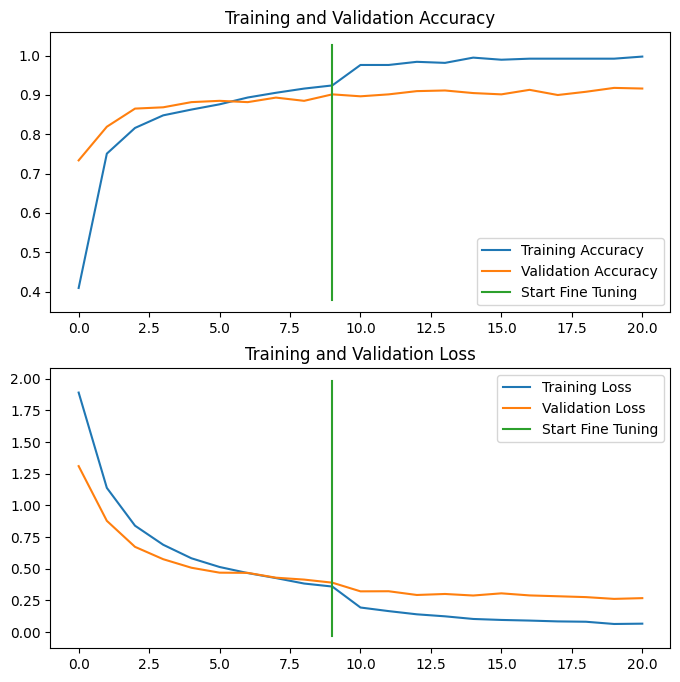

In [ ]:
compare_historys(model_X_history,
                 model_X_fine_tuned_30,
                 initial_epochs=10)

In [ ]:
# Evaluate our model
model_X.evaluate(test_data)

79/79 [==============================] - 124s 2s/step - loss: 0.3218 - accuracy: 0.8988


[0.32180342078208923, 0.8988000154495239]